In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


# Data Cleaning

In [5]:
df.shape

(11251, 15)

In [6]:
df.info

<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [6]:
df.drop(['Status','unnamed1'], axis='columns', inplace =True)

In [7]:
df.shape

(11251, 13)

In [8]:
#No of missing values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)
#to remove rows with missing values (NaN) from the DataFrame df


In [11]:
df['Amount']=df['Amount'].astype('int')
#to convert the 'Amount' column in the DataFrame df from its current data type to integer type.

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

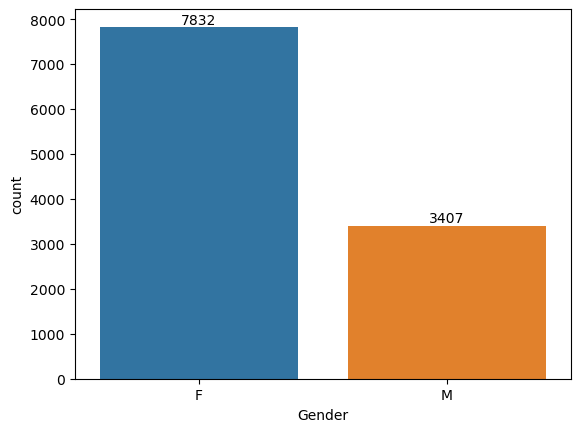

In [16]:

# Assuming 'Gender' is a column in your DataFrame 'df'
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)


In [17]:
grouped_gender = df.groupby(['Gender'], as_index=False)

In [18]:
sales_gen = grouped_gender['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


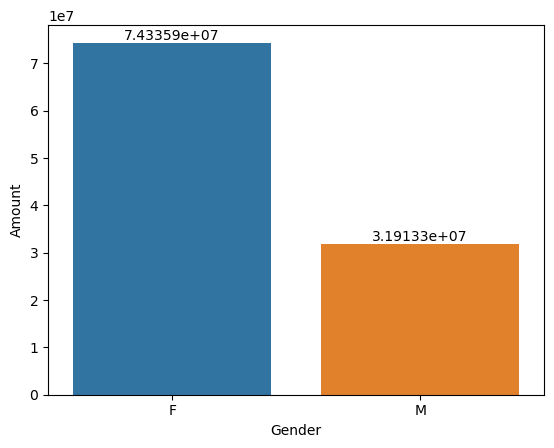

In [19]:
ax1= sns.barplot(x='Gender', y='Amount', data=sales_gen)
for bars in ax1.containers:
    ax1.bar_label(bars)

women shop more than men and their purchasing power is also greater than theirs

# Age

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

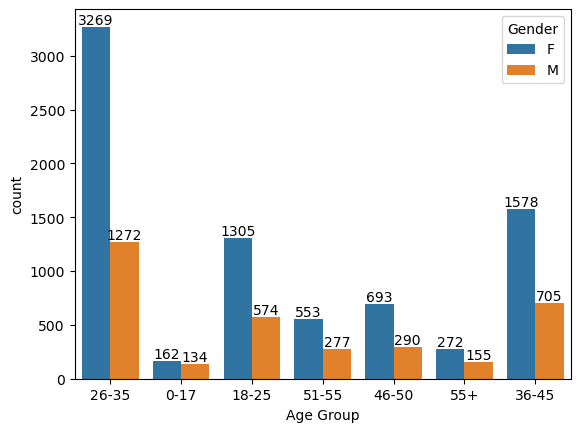

In [21]:
ax2= sns.countplot(data=df, x='Age Group', hue='Gender')

for bars in ax2.containers:
    ax2.bar_label(bars)

most money has been spent by women between the age of 26-35

In [22]:
grouped_age = df.groupby(['Age Group'], as_index = False)
sales_age_grp = grouped_age['Amount'].sum().sort_values(by='Amount',ascending = False)
sales_age_grp

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


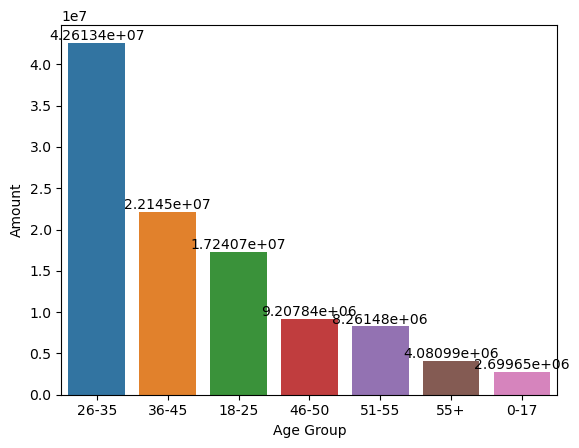

In [23]:

ax3=sns.barplot(x='Age Group', y='Amount', data=sales_age_grp)

for bars in ax3.containers:
    ax3.bar_label(bars)

most money has been spent by women between the age of 26-35

# State

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [25]:
grouped_state = df.groupby(['State'], as_index=False)


In [26]:
sales_orders= grouped_state['Orders'].sum().sort_values(by='Orders',ascending=False)

In [27]:
sales_orders

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


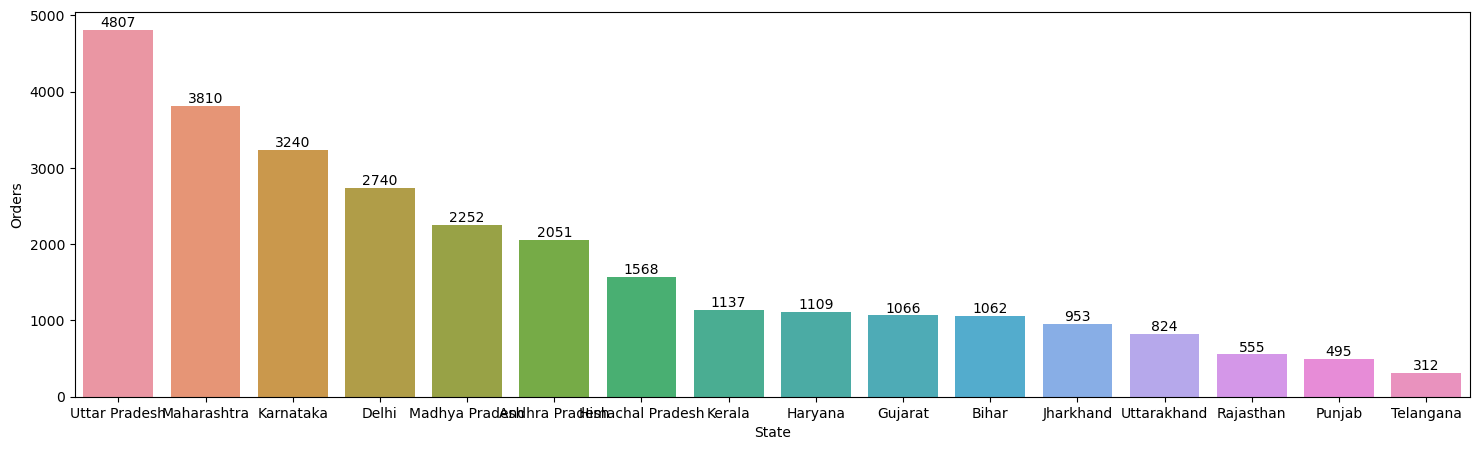

In [28]:
plt.figure(figsize=(18,5))
ax4= sns.barplot(data=sales_orders,x='State',y='Orders')

for bars in ax4.containers:
    ax4.bar_label(bars)

most of the orders were placed in Uttar Pardesh

In [29]:
sales_orders.head(10)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


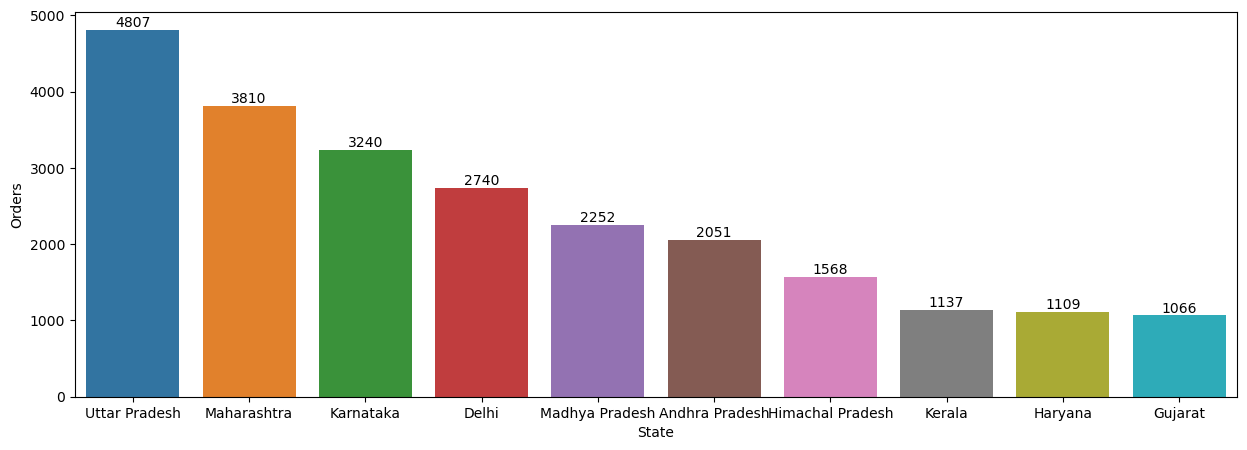

In [30]:

plt.figure(figsize = (15,5))
ax5 = sns.barplot(data = sales_orders.head(10), x = 'State', y ='Orders')
for bars in ax5.containers:
    ax5.bar_label(bars)

These are top 10 states in which most orders were placed

In [31]:
sales_orders.tail(10)

,State,Orders
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066
1,Bihar,1062
6,Jharkhand,953
15,Uttarakhand,824
12,Rajasthan,555
11,Punjab,495
13,Telangana,312


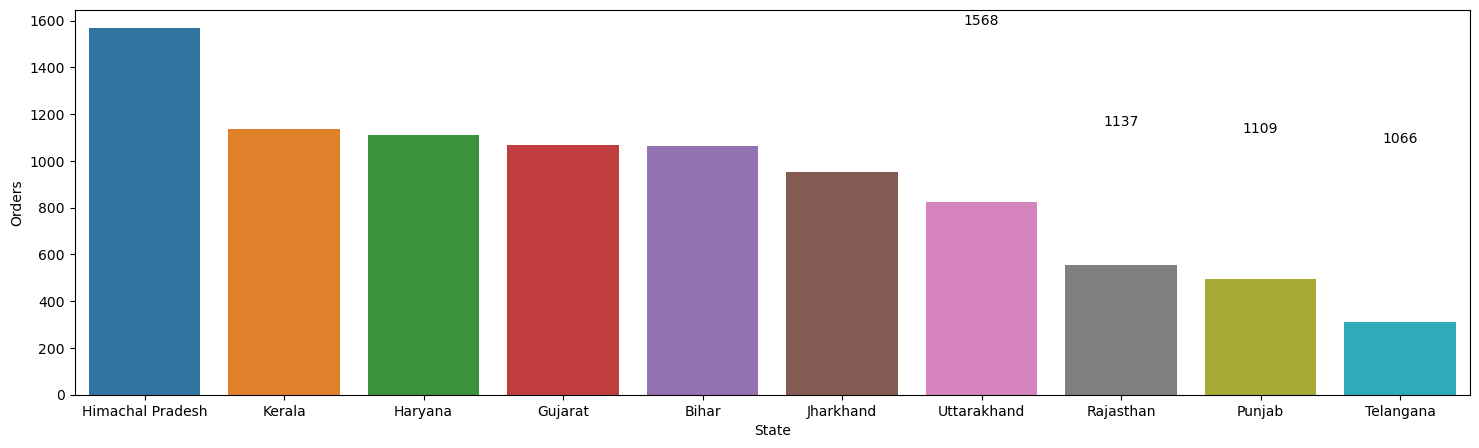

In [32]:
plt.figure(figsize=(18,5))
ax6= sns.barplot(data=sales_orders.tail(10),x='State',y='Orders')

for bars in ax5.containers:
    ax6.bar_label(bars)

these are those 10 states in which the least number of orders were placed

In [33]:
sales_amount= grouped_state['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_amount

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


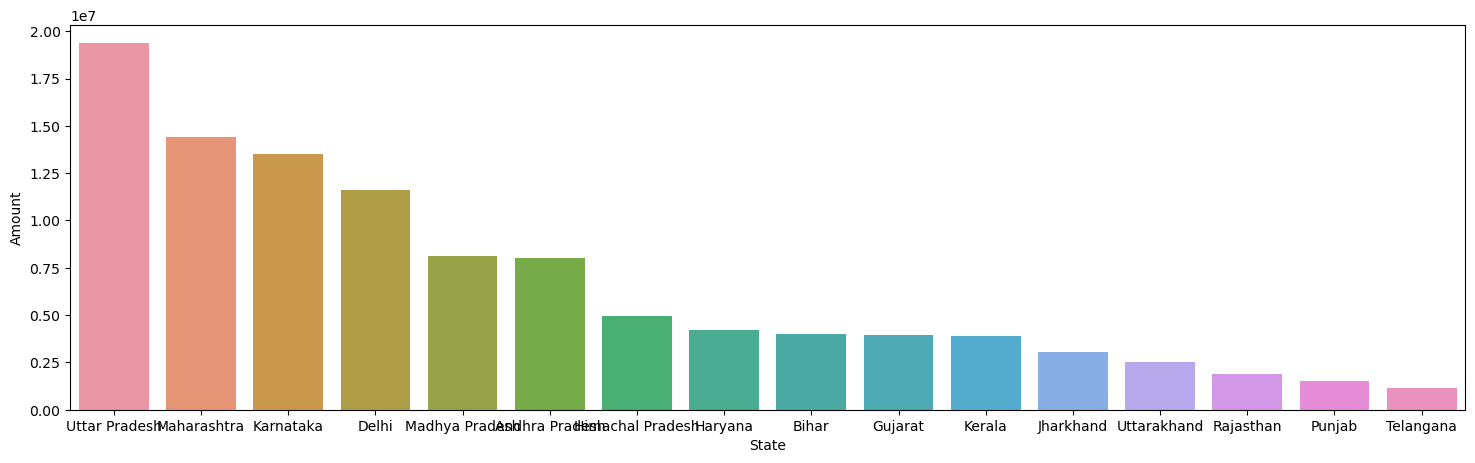

In [34]:
plt.figure(figsize=(18,5))
ax7=sns.barplot(data=sales_amount,x='State',y='Amount')

most of the amount was spent in Uttar Pardesh

In [35]:
sales_amount.head(10)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


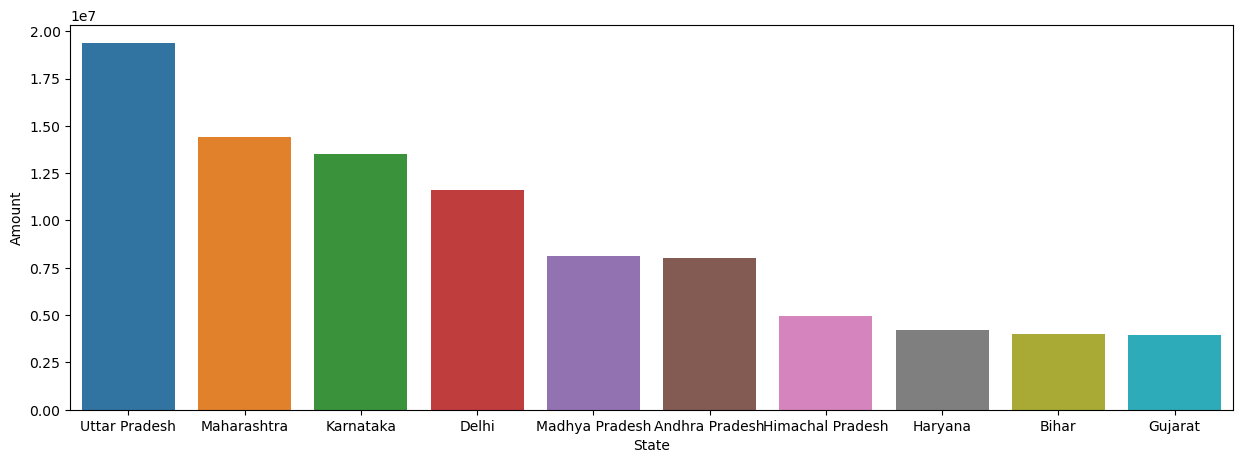

In [36]:
plt.figure(figsize=(15,5))
ax8= sns.barplot(data=sales_amount.head(10),x='State',y='Amount')

these are those top 10 states in which the most amount of money was spent

In [37]:
sales_amount.tail(10)

,State,Amount
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082
8,Kerala,3894491
6,Jharkhand,3026456
15,Uttarakhand,2520944
12,Rajasthan,1909409
11,Punjab,1525800
13,Telangana,1151490


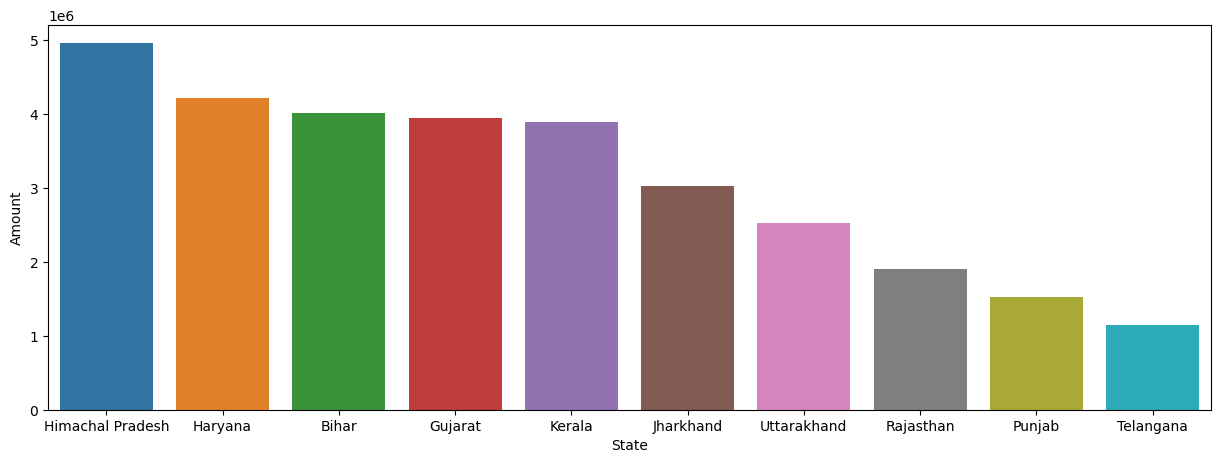

In [39]:
plt.figure(figsize=(15,5))
ax9= sns.barplot(data=sales_amount.tail(10),x='State',y='Amount')

these are those 10 states in which the least amount of money was spent

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Martial status

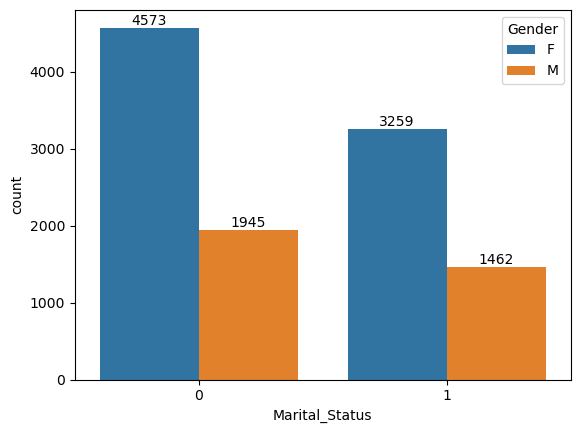

In [43]:
ax9 = sns.countplot(data = df, x='Marital_Status', hue ='Gender')
for bars in ax9.containers:
    ax9.bar_label(bars)

In [45]:
grouped_m= df.groupby(['Marital_Status','Gender'],as_index=False)

In [48]:
count_m= grouped_m['Amount'].sum().sort_values(by='Amount',ascending=False)
count_m

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


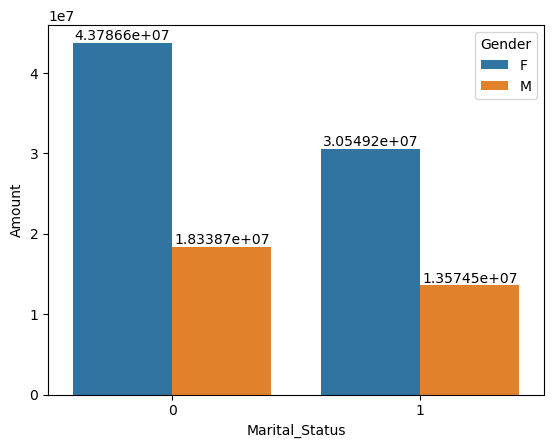

In [62]:
ax10= sns.barplot(x='Marital_Status',y='Amount',data = count_m,hue='Gender')

for bars in ax10.containers:
    ax10.bar_label(bars)
    


married women have the highest puchasing power as they have spent the most money

# Occupation

In [59]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

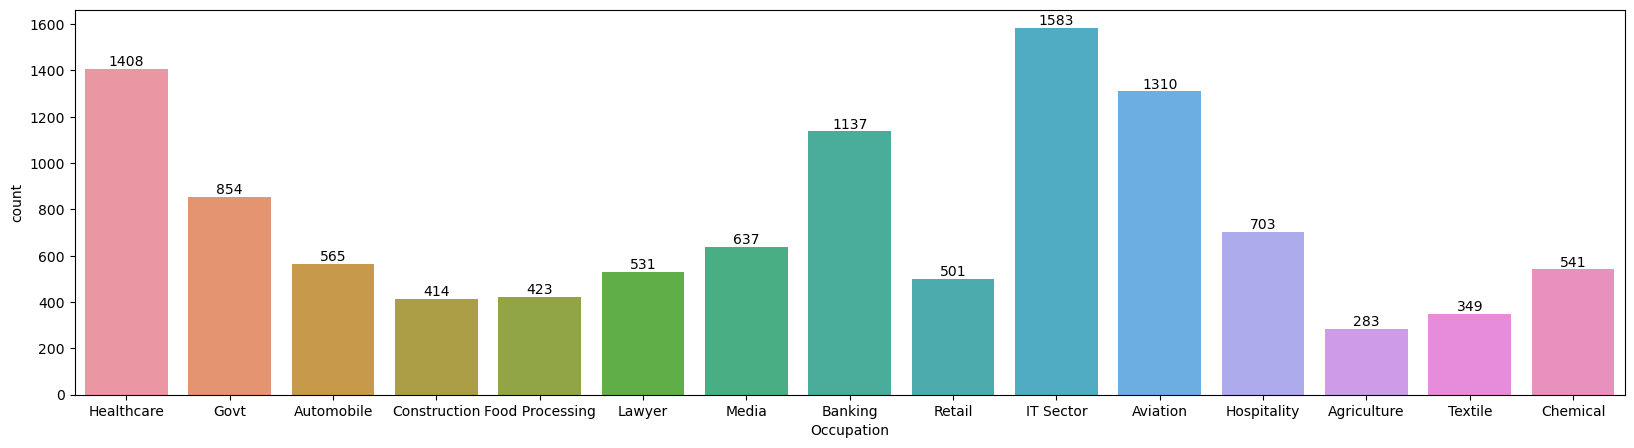

In [64]:
plt.figure(figsize=(20,5))
ax11= sns.countplot(data=df,x='Occupation')

for bars in ax11.containers:
    ax11.bar_label(bars)
    

In [67]:
grouped_o= df.groupby(['Occupation'],as_index=False)

In [69]:
sales_o=grouped_o['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_o

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


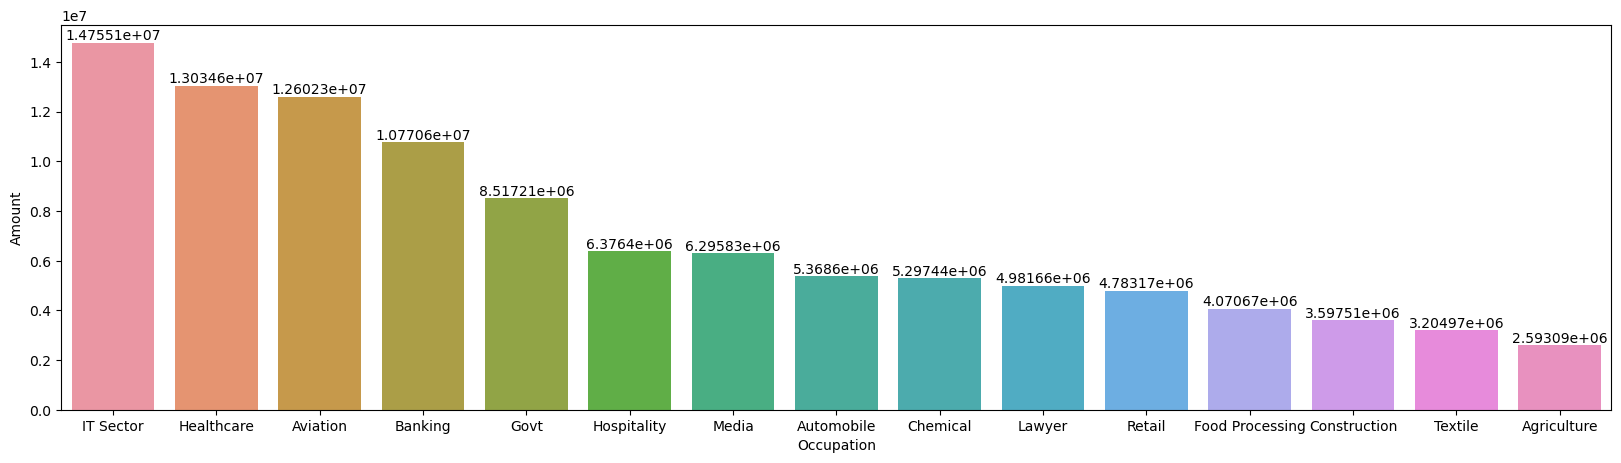

In [70]:
plt.figure(figsize=(20,5))
ax11=sns.barplot(x='Occupation',y='Amount',data=sales_o)

for bars in ax11.containers:
    ax11.bar_label(bars)

people from IT Healthcare and Aviation have spent the most amount of money

In [71]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Product category

In [74]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

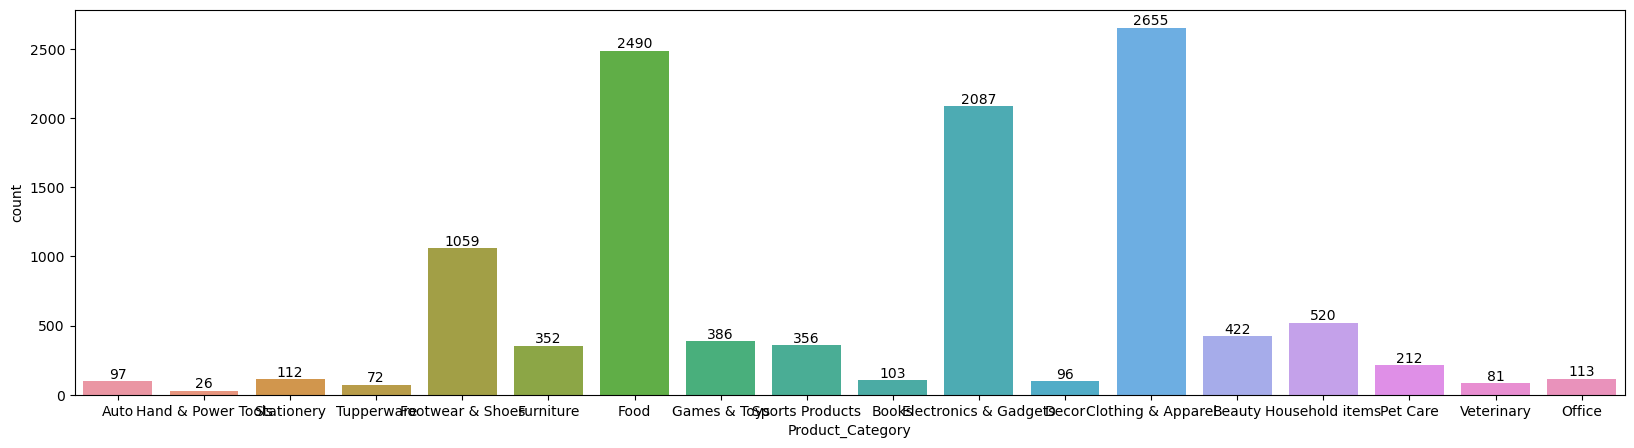

In [75]:
plt.figure(figsize=(20,5))
ax15 = sns.countplot(x='Product_Category',data=df)

for bars in ax15.containers:
    ax15.bar_label(bars)

here we can see that most orders were placed of clothing and apparel

In [77]:
grouped_p = df.groupby(['Product_Category'],as_index=False)

In [78]:
sales_p = grouped_p['Amount'].sum().sort_values(by='Amount',ascending = False)
sales_p

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


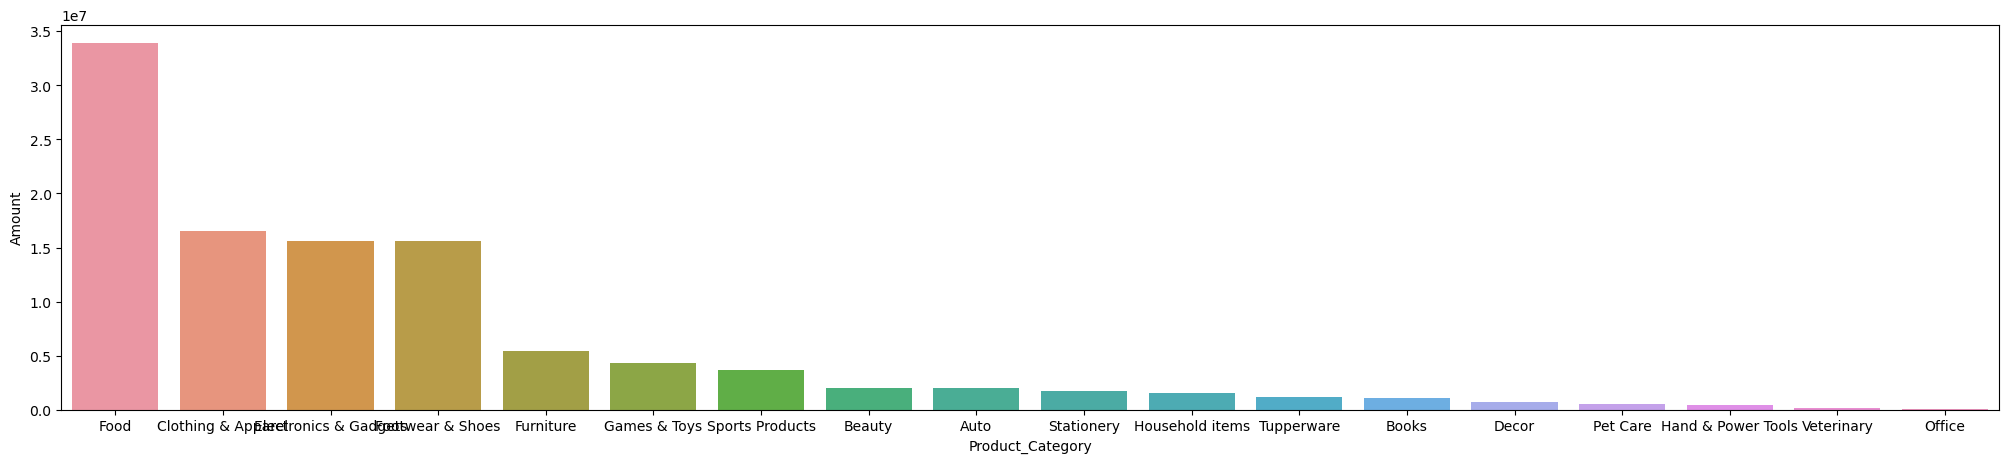

In [80]:
plt.figure(figsize=(25,5))
ax12 = sns.barplot(x='Product_Category',y='Amount',data = sales_p)

In [81]:
sales_p.head(10)

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


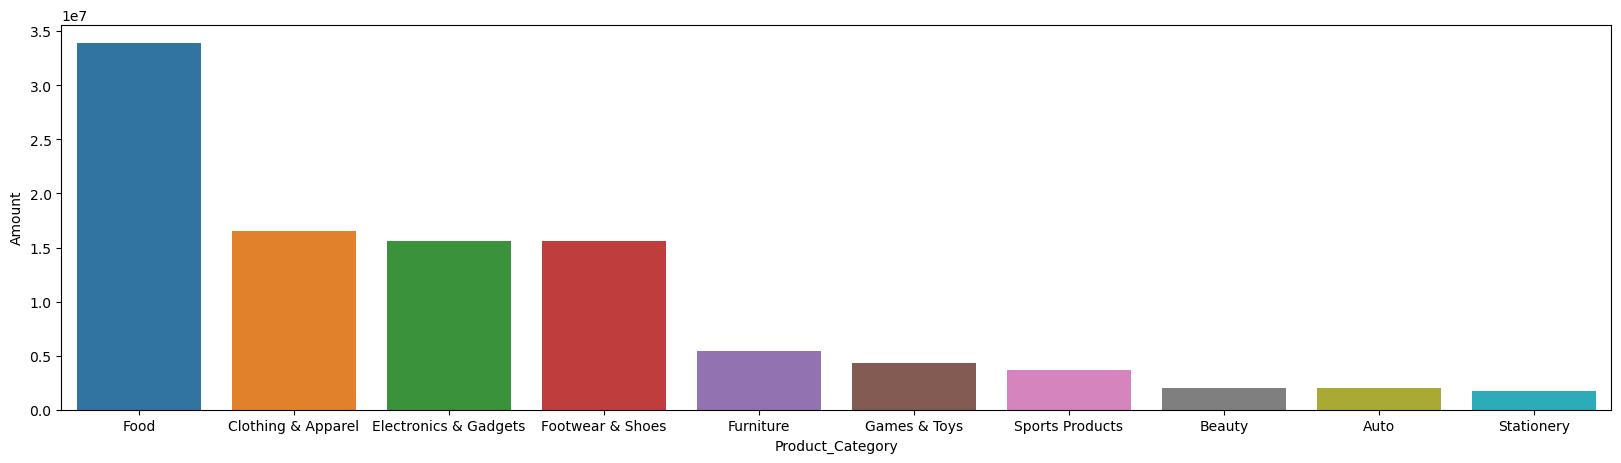

In [82]:
plt.figure(figsize = (20,5))
ax13 = sns.barplot(x='Product_Category',y='Amount',data = sales_p.head(10))

these are to 10 product categories on which the most ammount has been spent

In [83]:
sales_p.tail(5)

,Product_Category,Amount
4,Decor,730360
13,Pet Care,482277
10,Hand & Power Tools,405618
17,Veterinary,112702
12,Office,81936


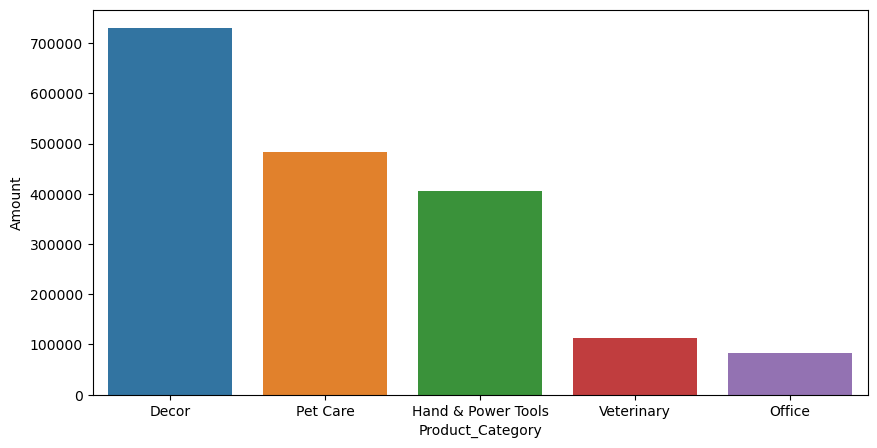

In [84]:
plt.figure(figsize = (10,5))
ax14 = sns.barplot(x='Product_Category',y='Amount',data = sales_p.tail(5))

these are those 5 product categories on which the most amount of money has been spent

In [85]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Product ID

<AxesSubplot:xlabel='Product_ID'>

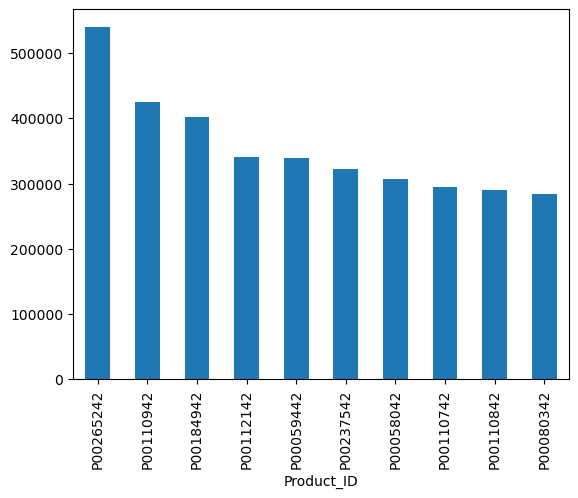

In [86]:

group_id = df.groupby(['Product_ID'])
sales_id = group_id['Amount'].sum().nlargest(10).sort_values(ascending = False).plot(kind='bar')
sales_id

Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics categor